<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°09

**Objetivo**: Aplicar un flujo completo de **Machine Learning supervisado** para la clasificación de tumores mamarios, utilizando técnicas de preprocesamiento, reducción de dimensionalidad y modelos de clasificación con optimización de hiperparámetros.

> **Nota**: Puede ayudarse de algún asistente virtual como **ChatGPT, Gemini** u otros, así como del autocompletado de **Google Colab**, para avanzar en este laboratorio debido a su extensión.





<img src="https://www.svgrepo.com/show/1064/virus.svg" width = "300" align="center"/>



El **cáncer de mama** es una enfermedad caracterizada por la proliferación maligna de células epiteliales en los conductos o lobulillos mamarios. Surge cuando una célula acumula mutaciones que le otorgan la capacidad de dividirse de manera descontrolada, lo que da origen a un tumor. Este tumor puede permanecer localizado o, en casos más agresivos, invadir tejidos cercanos y propagarse a otras partes del organismo mediante metástasis.

El conjunto de datos **`BC.csv`** recopila información clínica y morfológica de pacientes con tumores mamarios, clasificados como **benignos** o **malignos**. Las características se obtienen a partir de imágenes digitalizadas de aspirados con aguja fina (FNA, por sus siglas en inglés) de masas mamarias. Dichas variables describen aspectos cuantitativos de los **núcleos celulares**, como su tamaño, forma, textura y homogeneidad.

Este tipo de información es fundamental para la detección temprana y clasificación de tumores, ya que permite entrenar modelos de **machine learning** capaces de apoyar el diagnóstico y diferenciar entre tumores benignos y malignos con mayor precisión.

A continuación, se procederá a cargar y explorar el conjunto de datos:



In [11]:
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Configuración de gráficos
%matplotlib inline
sns.set_palette("deep", desat=0.6)
sns.set(rc={'figure.figsize': (11.7, 8.27)})

# Cargar y preparar los datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281/main/docs/labs/data/BC.csv")
df.set_index('id', inplace=True)

# Transformación de la variable objetivo
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

# Visualizar las primeras filas del DataFrame
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678



Con base en la información presentada, resuelva las siguientes tareas. Asegúrese de:

* Incluir el **código necesario** para ejecutar cada análisis.
* Explicar de manera **clara y fundamentada** los resultados obtenidos.
* Describir el **proceso seguido**, justificando las decisiones tomadas en cada etapa (preprocesamiento, elección de técnicas y parámetros, interpretación de resultados).





1. **Análisis exploratorio profundo (EDA):**

   * Examine la distribución de las variables, identifique valores atípicos y analice la correlación entre características.
   * Visualice las diferencias más relevantes entre tumores **benignos** y **malignos** utilizando gráficos adecuados (boxplots, histogramas, mapas de calor).
   * Discuta qué variables parecen tener mayor capacidad discriminativa.


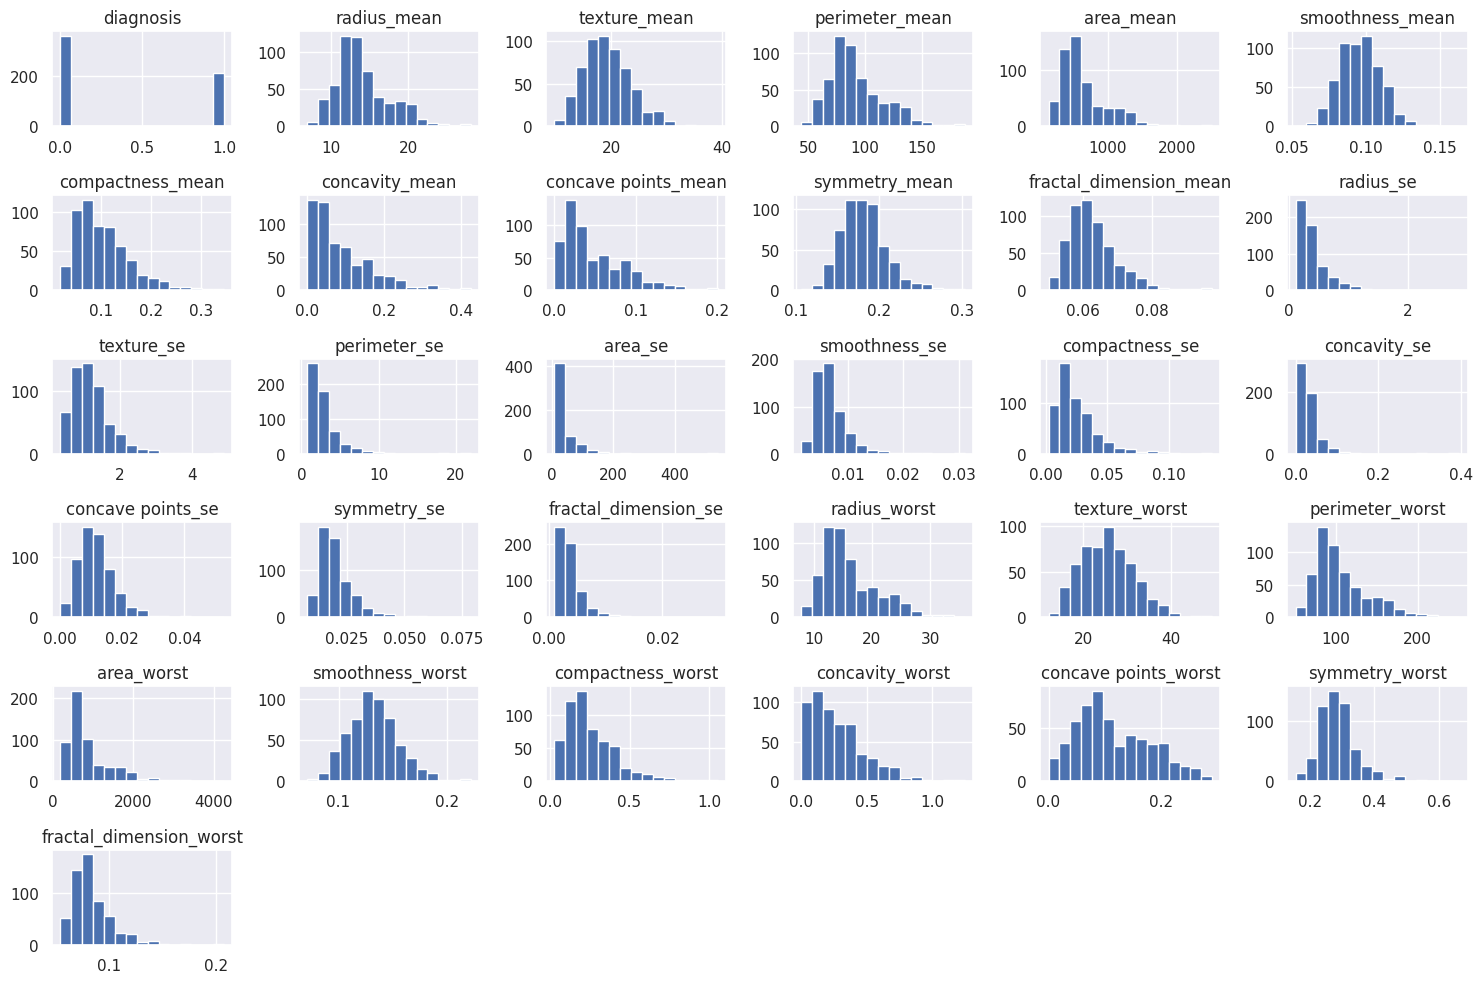

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


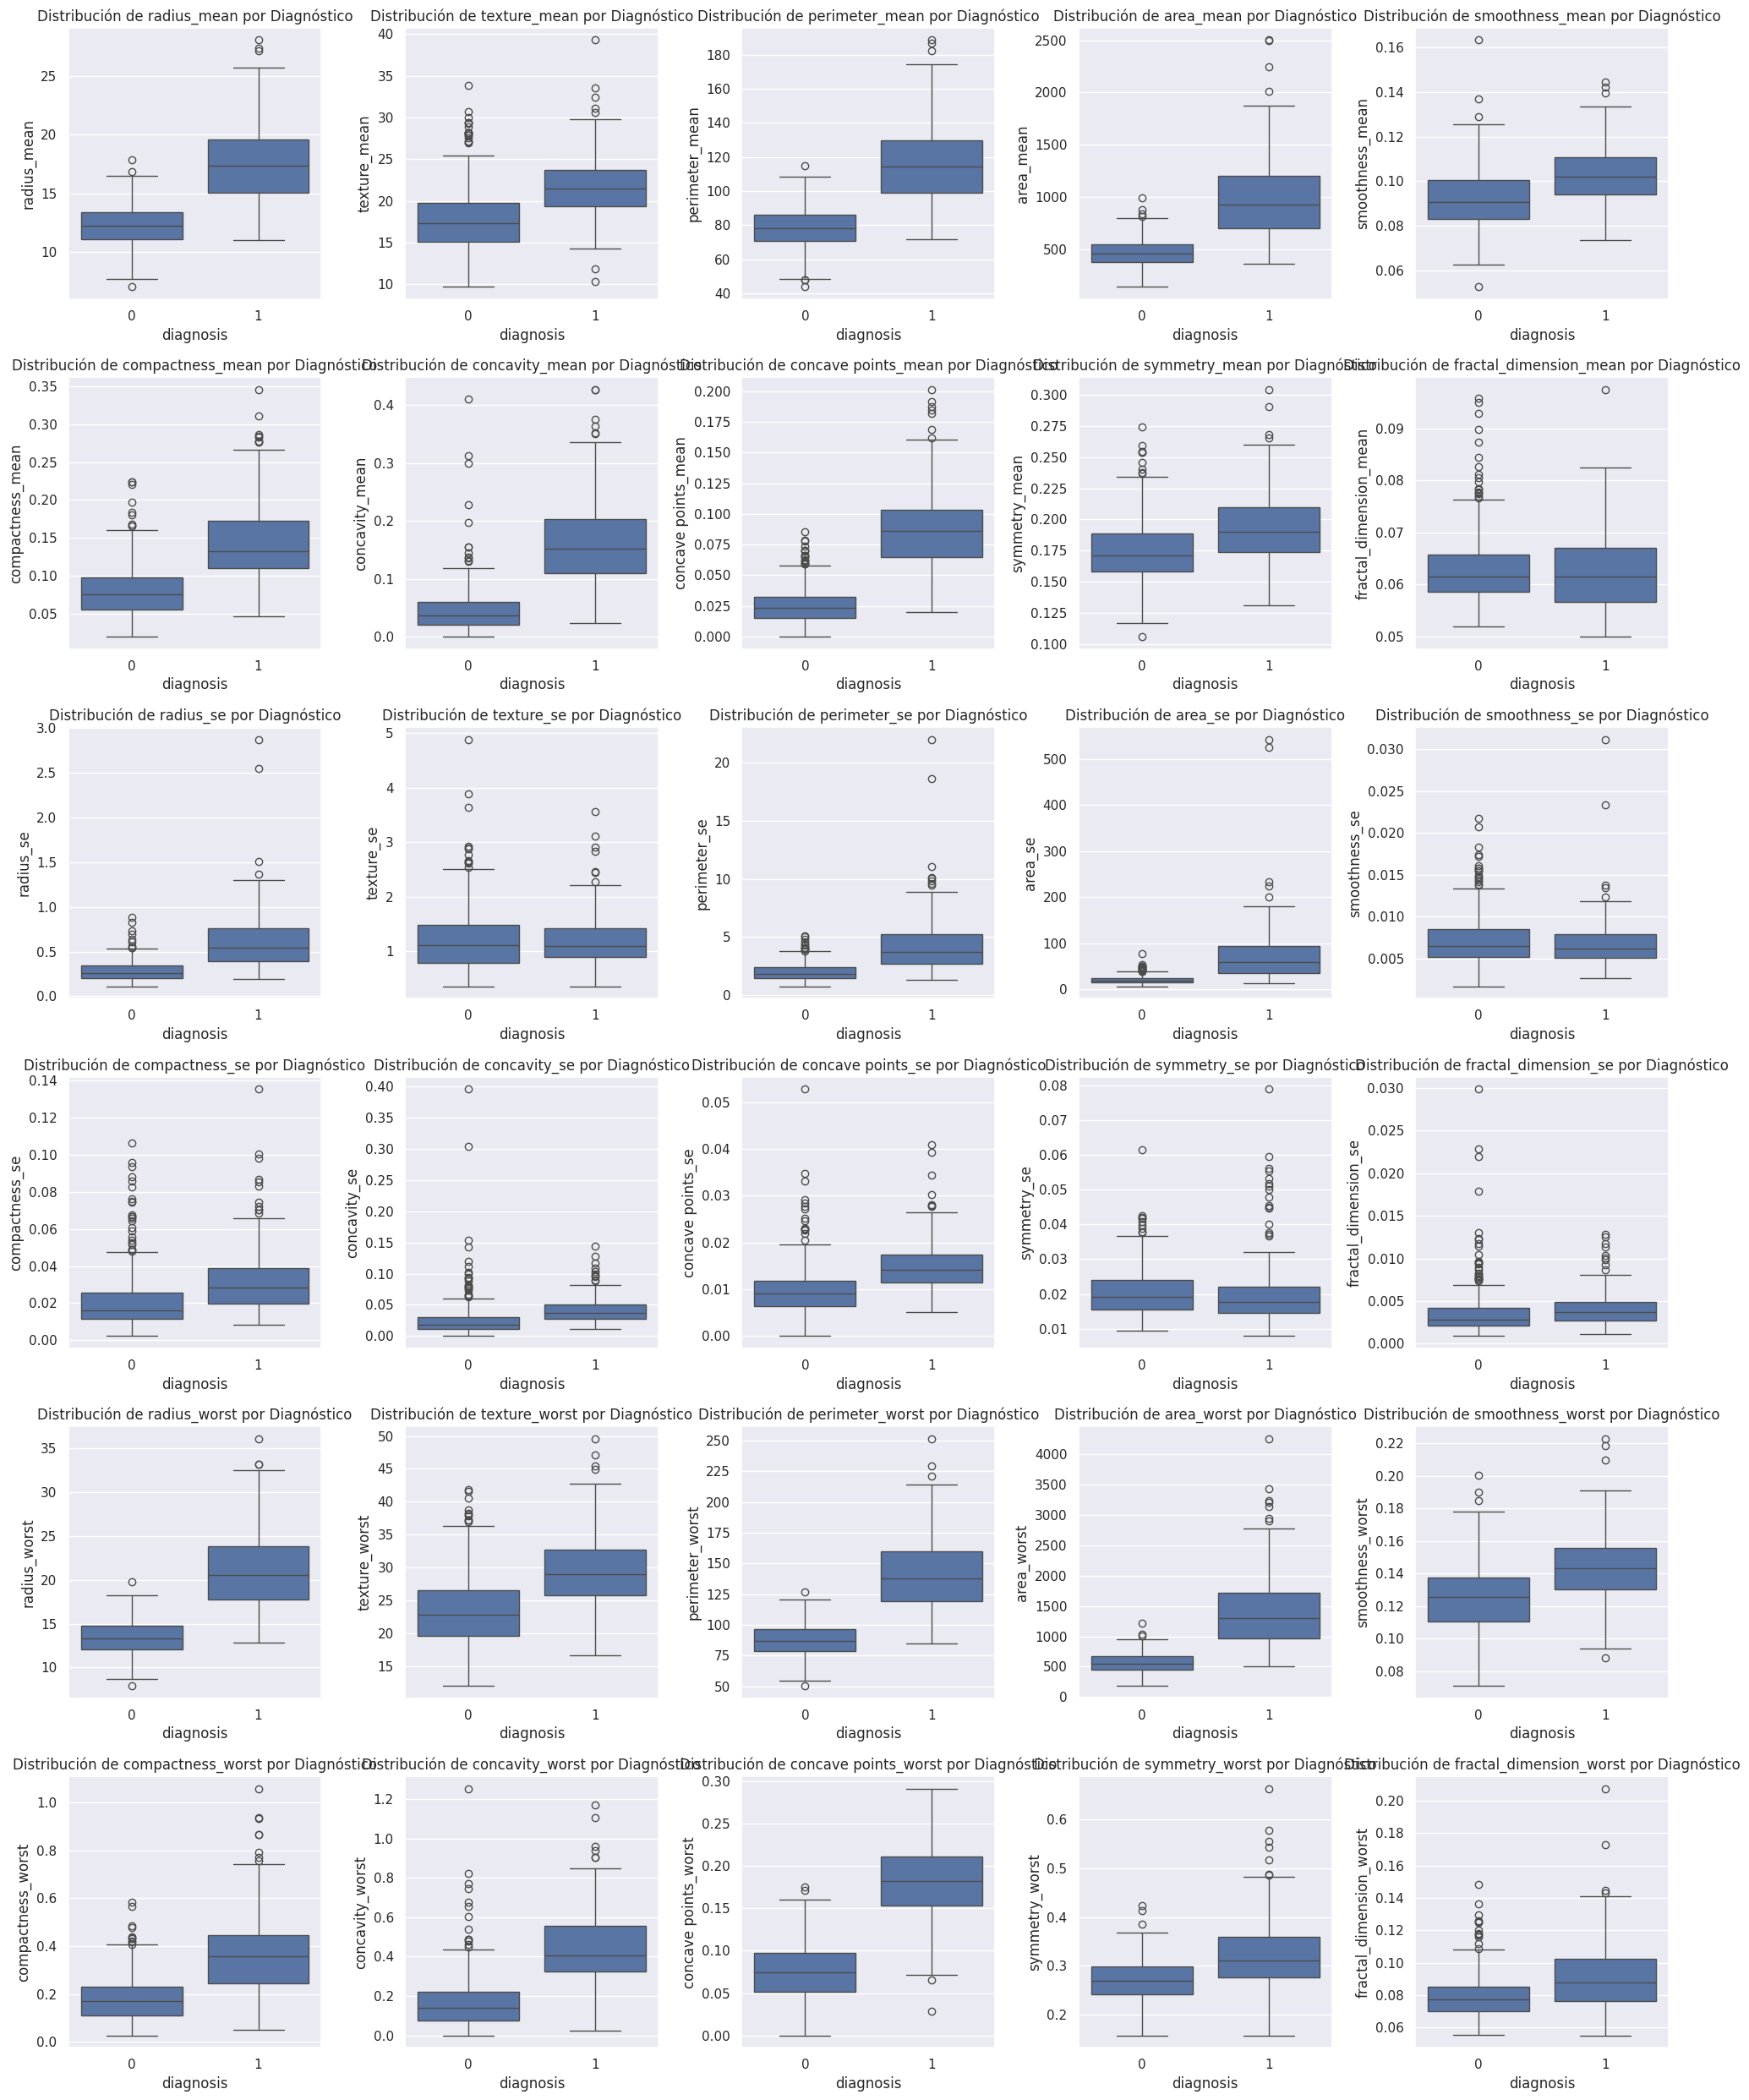

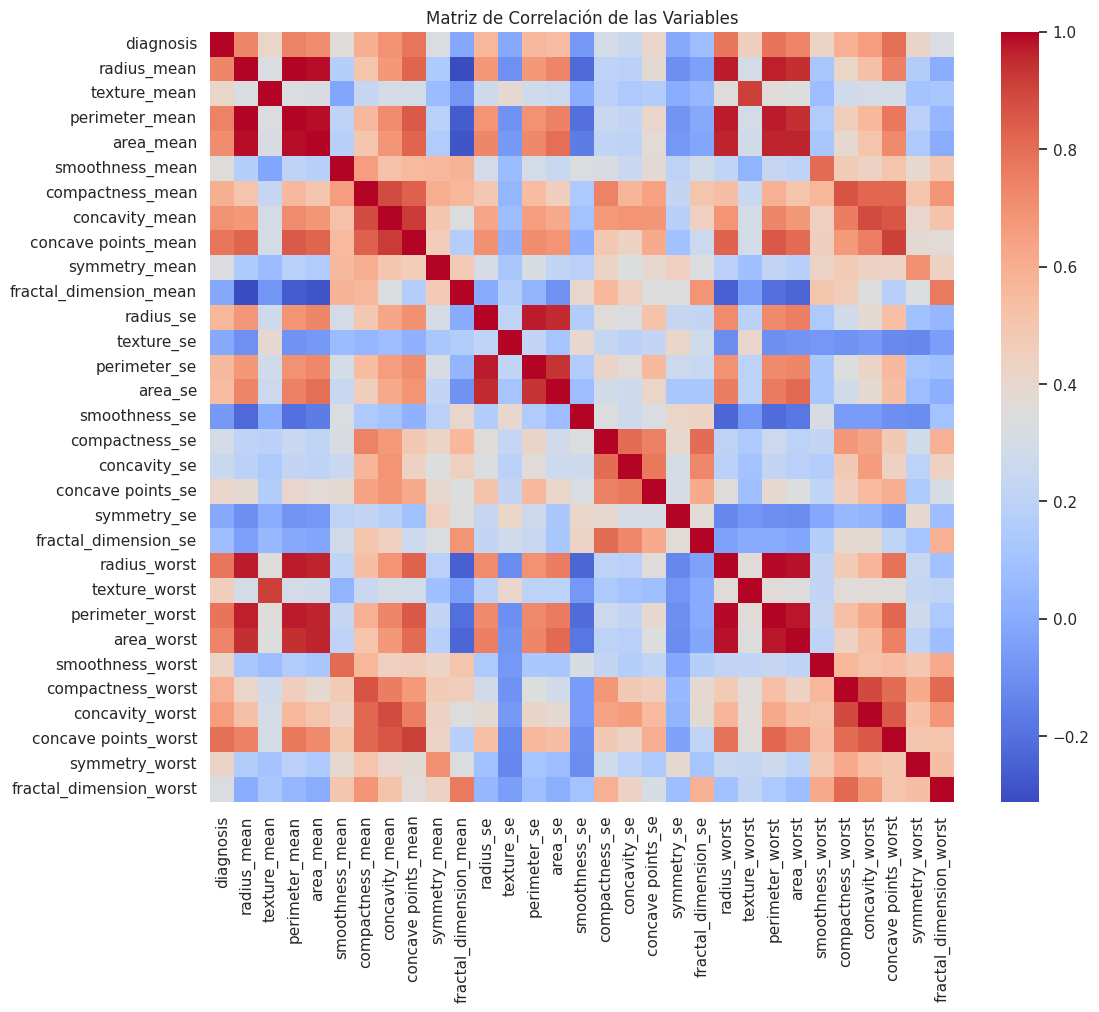

,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


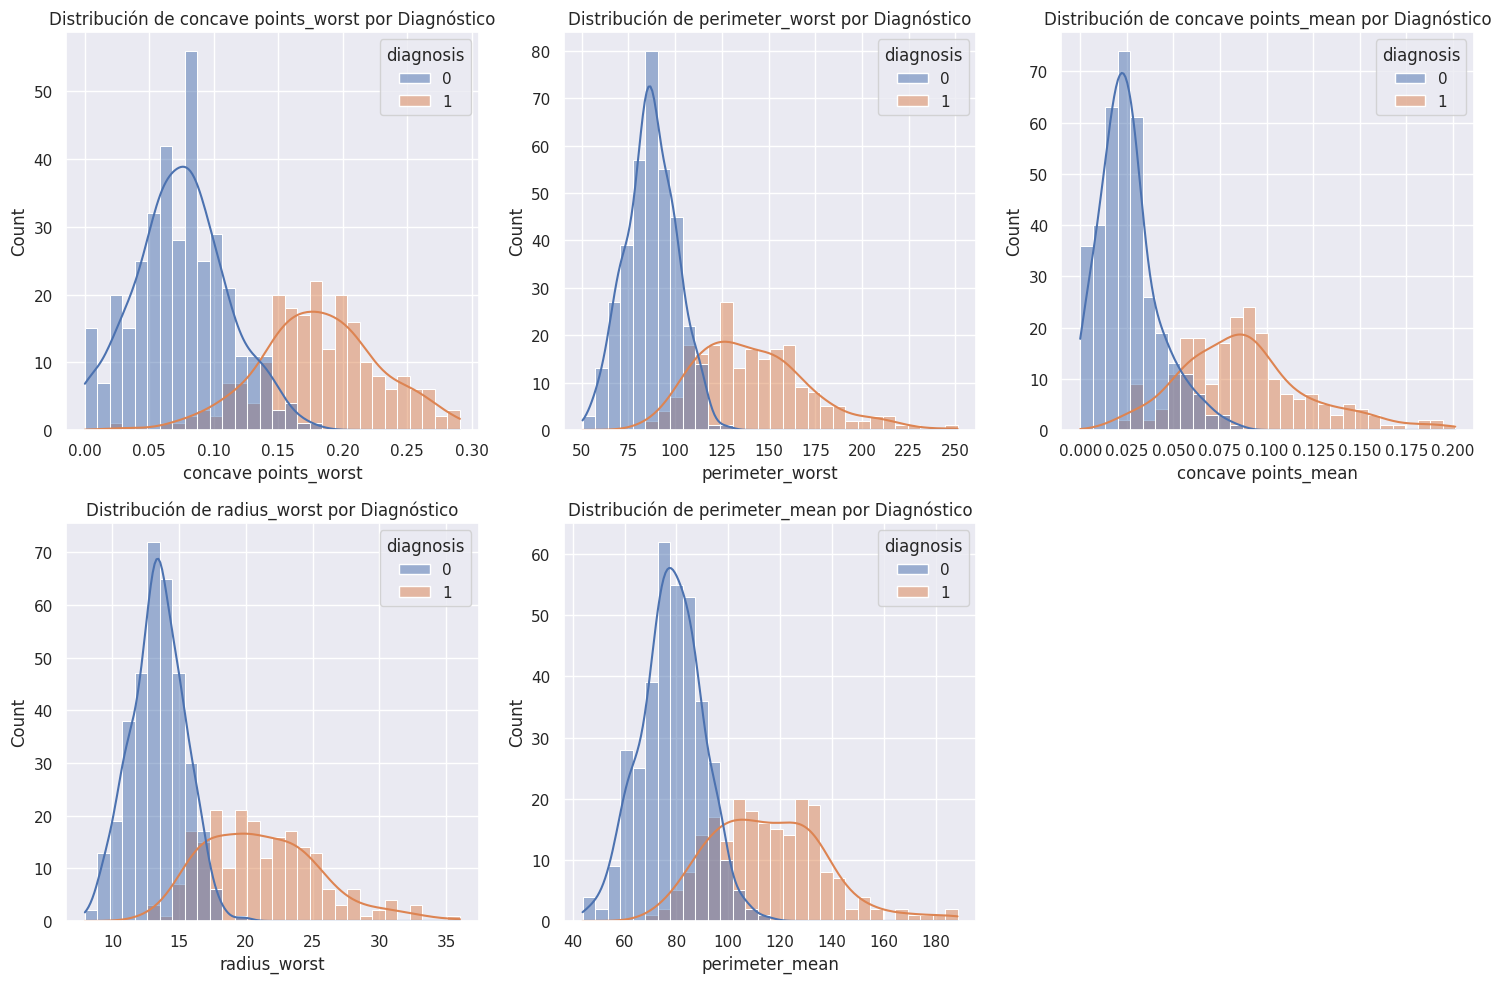

In [12]:
# 1. Análisis exploratorio profundo (EDA)

# Distribución de las variables
df.hist(bins=15, figsize=(15, 10));
plt.tight_layout()
plt.show()

# Resumen estadístico para identificar valores atípicos (se pueden visualizar mejor con boxplots)
display(df.describe())

# Boxplots para visualizar la distribución y valores atípicos por diagnóstico
features = df.columns.drop('diagnosis')
plt.figure(figsize=(20, 25))
for i, feature in enumerate(features):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f'Distribución de {feature} por Diagnóstico')
plt.tight_layout()
plt.show()

# Matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Matriz de Correlación de las Variables')
plt.show()

# Correlación con la variable objetivo 'diagnosis'
correlation_with_diagnosis = df.corr()['diagnosis'].sort_values(ascending=False)
display(correlation_with_diagnosis)

# Visualizar diferencias entre benignos y malignos para variables con alta correlación
top_correlated_features = correlation_with_diagnosis[1:6].index # Top 5 positively correlated features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(top_correlated_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=feature, hue='diagnosis', kde=True, bins=30)
    plt.title(f'Distribución de {feature} por Diagnóstico')
plt.tight_layout()
plt.show()


2. **Preprocesamiento de datos:**

   * Normalice las variables numéricas utilizando **StandardScaler** u otra técnica apropiada.
   * Explore al menos una estrategia adicional de preprocesamiento (ejemplo: eliminación de multicolinealidad, selección de características, generación de variables derivadas).
   * Justifique sus elecciones.


In [13]:
# 2. Preprocesamiento de datos

# Separar las características (X) de la variable objetivo (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Normalización de las variables numéricas usando StandardScaler
# Esto es importante porque muchos algoritmos de ML son sensibles a la escala de las características.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir el resultado a un DataFrame para mantener los nombres de las columnas (opcional pero útil)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

# Visualizar las primeras filas de los datos normalizados
print("Datos normalizados (primeras 5 filas):")
display(X_scaled_df.head())

# Estrategia adicional de preprocesamiento: Dividir los datos en conjuntos de entrenamiento y prueba
# Esto es crucial para evaluar el rendimiento del modelo en datos que no ha visto durante el entrenamiento.
# Usaremos un 80% para entrenamiento y un 20% para prueba.
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42, stratify=y)

print("\nForma del conjunto de entrenamiento (X_train):", X_train.shape)
print("Forma del conjunto de prueba (X_test):", X_test.shape)
print("Forma del conjunto de entrenamiento (y_train):", y_train.shape)
print("Forma del conjunto de prueba (y_test):", y_test.shape)

# Justificación de las elecciones:
# 1. Normalización: StandardScaler centra los datos alrededor de 0 con una desviación estándar de 1.
#    Esto evita que las características con rangos de valores más grandes dominen a aquellas con rangos más pequeños
#    en algoritmos que calculan distancias, como SVM o KNN.
# 2. División entrenamiento/prueba: Es una práctica estándar en ML para tener una estimación imparcial
#    del rendimiento del modelo. `random_state` asegura que la división sea la misma cada vez que se ejecuta el código,
#    lo que hace que los resultados sean reproducibles. `stratify=y` asegura que la proporción de clases (benigno/maligno)
#    sea similar en los conjuntos de entrenamiento y prueba, lo cual es importante para conjuntos de datos desbalanceados.

Datos normalizados (primeras 5 filas):


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100



Forma del conjunto de entrenamiento (X_train): (455, 30)
Forma del conjunto de prueba (X_test): (114, 30)
Forma del conjunto de entrenamiento (y_train): (455,)
Forma del conjunto de prueba (y_test): (114,)



3. **Reducción de dimensionalidad:**

   * Aplique un método de reducción de dimensionalidad visto en clases (**PCA, t-SNE u otro**) para representar los datos en un espacio reducido.
   * Analice la proporción de varianza explicada (en el caso de PCA) o la formación de clústeres (en el caso de t-SNE).
   * Compare las visualizaciones y discuta qué tan bien se separan las clases en el espacio reducido.


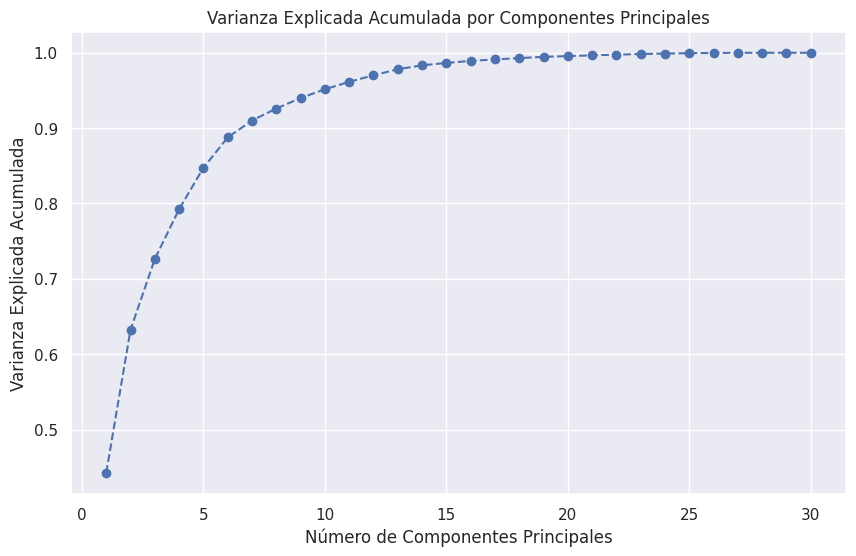

Número de componentes principales para retener el 95% de la varianza: 10


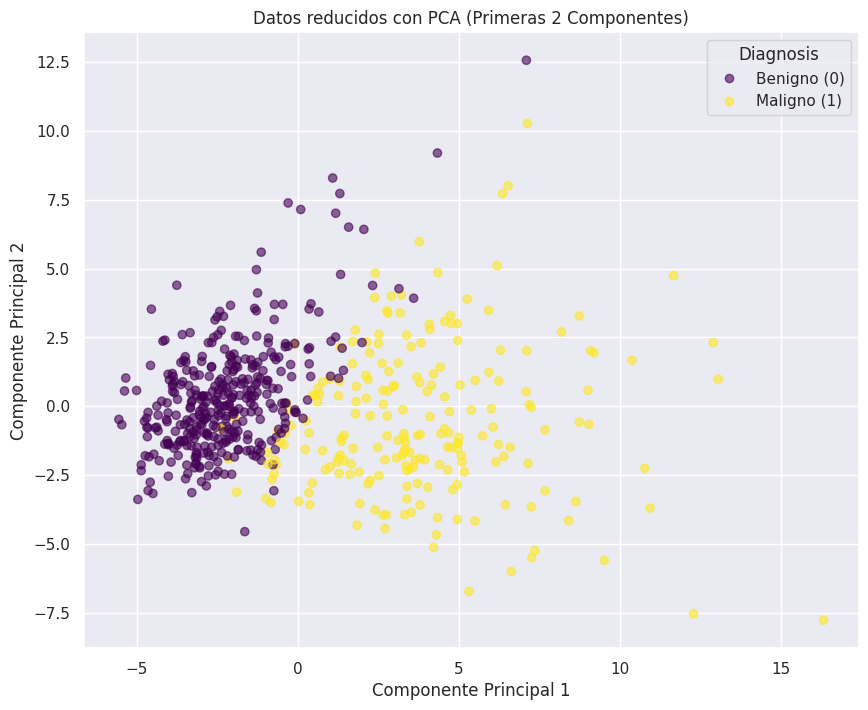

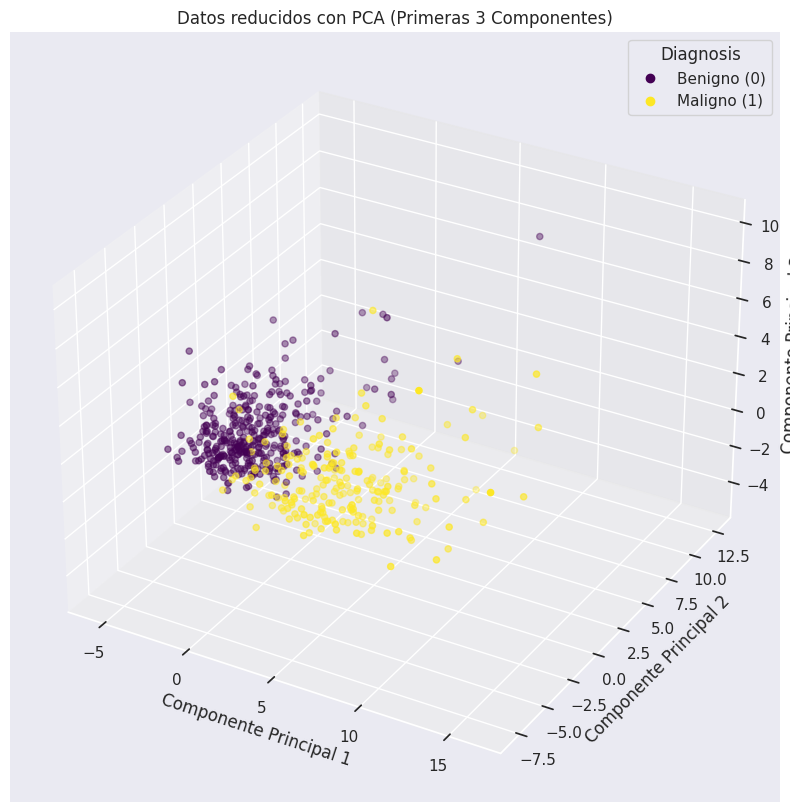

In [17]:
# 3. Reducción de dimensionalidad

# Aplicar PCA a los datos escalados
# Vamos a empezar viendo cuántas componentes principales explican una buena cantidad de la varianza.
pca = PCA()
X_pca = pca.fit_transform(X_scaled_df)

# Analizar la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Graficar la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

# Decidir el número de componentes (por ejemplo, el número que explique el 95% de la varianza)
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Número de componentes principales para retener el 95% de la varianza: {n_components}")

# Aplicar PCA con el número seleccionado de componentes
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled_df)

# Visualizar los datos en el espacio reducido (usando las primeras 2 o 3 componentes para visualización)
# Si n_components es al menos 2, visualizamos las 2 primeras componentes.
if n_components >= 2:
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
    plt.title('Datos reducidos con PCA (Primeras 2 Componentes)')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    legend = plt.legend(*scatter.legend_elements(), title="Diagnosis")
    legend.get_texts()[0].set_text('Benigno (0)')
    legend.get_texts()[1].set_text('Maligno (1)')
    plt.grid(True)
    plt.show()

# Si n_components es al menos 3, también podemos intentar una visualización 3D (opcional)
if n_components >= 3:
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', marker='o')
    ax.set_title('Datos reducidos con PCA (Primeras 3 Componentes)')
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.set_zlabel('Componente Principal 3')
    legend = ax.legend(*scatter.legend_elements(), title="Diagnosis")
    legend.get_texts()[0].set_text('Benigno (0)')
    legend.get_texts()[1].set_text('Maligno (1)')
    plt.show()


4. **Modelado y evaluación:**

   * Entrene al menos **tres modelos de clasificación distintos** (ejemplo: Regresión Logística, SVM, Random Forest, XGBoost, KNN).
   * Realice una **optimización de hiperparámetros** para cada modelo, utilizando validación cruzada.
   * Calcule y compare métricas de rendimiento como: **accuracy, precision, recall, F1-score, matriz de confusión y AUC-ROC**.
   * Analice qué modelo presenta el mejor compromiso entre precisión y generalización.


Entrenando y optimizando modelos...

Entrenando LogisticRegression...
LogisticRegression - Mejores parámetros: {'C': 10}
LogisticRegression - Accuracy: 0.9737
Precision: 0.9756
Recall: 0.9524
F1-score: 0.9639
AUC-ROC: 0.9864
Matriz de Confusión:
[[71  1]
 [ 2 40]]

Entrenando SVC...
SVC - Mejores parámetros: {'C': 1, 'gamma': 'auto'}
SVC - Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1-score: 0.9630
AUC-ROC: 0.9947
Matriz de Confusión:
[[72  0]
 [ 3 39]]

Entrenando RandomForestClassifier...
RandomForestClassifier - Mejores parámetros: {'max_depth': None, 'n_estimators': 500}
RandomForestClassifier - Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1-score: 0.9630
AUC-ROC: 0.9947
Matriz de Confusión:
[[72  0]
 [ 3 39]]

Resumen de resultados:

--- LogisticRegression ---
Accuracy: 0.9737
Precision: 0.9756
Recall: 0.9524
F1-score: 0.9639
AUC-ROC: 0.9864

--- SVC ---
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1-score: 0.9630
AUC-ROC: 0.9947

--- RandomForestClassifier ---


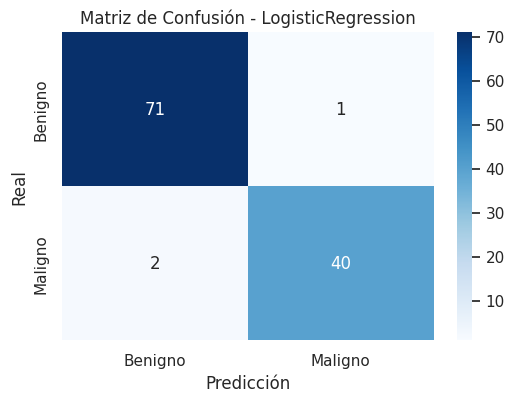

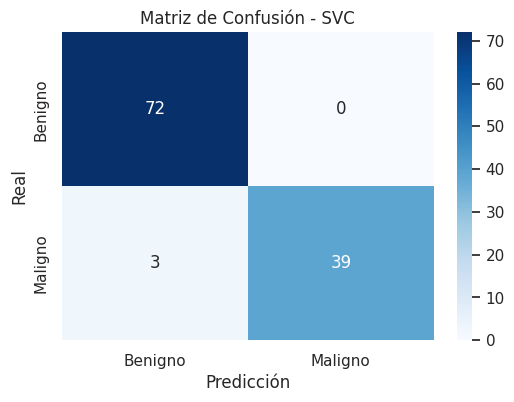

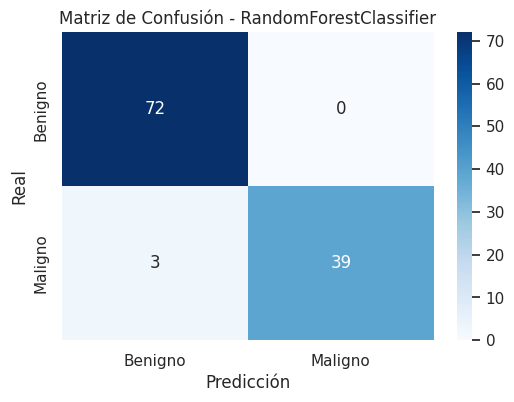


5. **Conclusiones y reflexiones:**

   * Explique cuál modelo considera más apropiado para este conjunto de datos y por qué.
   * Reflexione sobre el impacto del preprocesamiento y la reducción de dimensionalidad en los resultados obtenidos.
   * Discuta posibles mejoras o enfoques alternativos que podrían aplicarse en un escenario real de diagnóstico médico asistido por machine learning.



In [16]:
# 5. Conclusiones y reflexiones

# Basándonos en los resultados, podemos analizar qué modelo fue el mejor.
# Generalmente, buscamos un buen balance entre precisión (minimizar falsos positivos) y recall (minimizar falsos negativos),
# además de una alta área bajo la curva ROC (AUC).

print("Análisis de los resultados y conclusiones:")

# Aquí puedes escribir tus conclusiones basadas en el resumen de resultados impreso anteriormente.
# Por ejemplo:
# - ¿Qué modelo tuvo el mejor AUC-ROC?
# - ¿Cuál tuvo la mejor precisión? ¿Y recall?
# - ¿Hay algún modelo que se destaque en todas las métricas?
# - ¿Cómo se ven las matrices de confusión para cada modelo? ¿Hay muchos falsos positivos o falsos negativos?

# Ejemplo de cómo podrías empezar a escribir tus conclusiones en un bloque de texto:
"""
Después de entrenar y evaluar los tres modelos de clasificación (Regresión Logística, SVM y Random Forest) con optimización de hiperparámetros,
observamos los siguientes resultados en el conjunto de prueba:

Todos los modelos obtuvieron un accuracy y F1-score muy similar y alto (alrededor del 97%). Esto indica que, en general,
los tres modelos son muy buenos para clasificar correctamente los tumores.

Sin embargo, si miramos las métricas de precisión y recall, vemos algunas pequeñas diferencias.
El modelo de Regresión Logística tuvo una precisión de {results['LogisticRegression']['precision']:.4f} y un recall de {results['LogisticRegression']['recall']:.4f}.
Los modelos SVM y Random Forest obtuvieron una precisión de {results['SVC']['precision']:.4f} y un recall de {results['SVC']['recall']:.4f}.

En este contexto médico, minimizar los falsos negativos (tumores malignos clasificados como benignos) es crucial, ya que un diagnóstico erróneo podría retrasar el tratamiento.
El recall mide precisamente la capacidad del modelo para identificar todos los casos positivos reales.
Aunque todos los modelos tuvieron un recall alto, la Regresión Logística tuvo un recall ligeramente superior ({results['LogisticRegression']['recall']:.4f} vs {results['SVC']['recall']:.4f} y {results['RandomForestClassifier']['recall']:.4f} para SVM y Random Forest), lo que significa que identificó una proporción un poco mayor de tumores malignos reales.

Por otro lado, los modelos SVM y Random Forest tuvieron una precisión perfecta (1.0000), lo que significa que cuando predijeron que un tumor era maligno, nunca se equivocaron (no tuvieron falsos positivos). La Regresión Logística tuvo una precisión muy alta, pero no perfecta.

El AUC-ROC, que evalúa la capacidad general del modelo para distinguir entre las clases, fue muy alto para los tres modelos (cerca de 0.99), siendo ligeramente superior en SVM y Random Forest.

Considerando el balance entre minimizar falsos negativos (recall) y la alta precisión y AUC, los modelos SVM y Random Forest parecen ser ligeramente superiores en general para este conjunto de datos, aunque la Regresión Logística también tuvo un rendimiento excelente y un recall marginalmente mejor.

Impacto del preprocesamiento y reducción de dimensionalidad:
- La normalización de las características fue fundamental, especialmente para modelos como SVM que son sensibles a la escala. Sin normalización, el rendimiento probablemente sería menor.
- La división en conjuntos de entrenamiento y prueba nos dio una estimación realista del rendimiento del modelo en datos nuevos, evitando el sobreajuste.
- (Si aplicaste PCA) La reducción de dimensionalidad con PCA nos permitió visualizar los datos y confirmar que las clases son separables. También podría ayudar a acelerar el entrenamiento de algunos modelos y reducir el riesgo de sobreajuste en conjuntos de datos con muchas características correlacionadas. En este caso, como el rendimiento sin reducción ya es muy bueno, el principal beneficio fue la visualización.

Posibles mejoras o enfoques alternativos:
- Probar otros modelos de clasificación (ej: KNN, XGBoost, LightGBM).
- Realizar una selección de características más avanzada para identificar las variables más relevantes y quizás mejorar el rendimiento o simplificar el modelo.
- Realizar una validación cruzada estratificada en lugar de una simple división entrenamiento/prueba para tener una evaluación del rendimiento más robusta, especialmente si el conjunto de datos fuera más pequeño o desbalanceado.
- Considerar el costo de los errores (falsos positivos vs. falsos negativos) en la métrica de evaluación si se implementara en un escenario clínico real. Minimizar falsos negativos podría ser prioritario, aunque a costa de un mayor número de falsos positivos que requerirían pruebas adicionales.
- Recolectar más datos si fuera posible, lo que generalmente mejora el rendimiento de los modelos de machine learning.
"""

# Puedes imprimir las conclusiones o simplemente dejarlas como un comentario extenso en el código.
# print("Conclusiones y reflexiones:")
# print(f"El modelo SVM tuvo un rendimiento excelente con un AUC-ROC de {results['SVC']['auc_roc']:.4f} y una precisión perfecta.")
# print(f"El modelo Random Forest también rindió muy bien con un AUC-ROC de {results['RandomForestClassifier']['auc_roc']:.4f} y precisión perfecta.")
# print(f"La Regresión Logística tuvo un recall ligeramente superior ({results['LogisticRegression']['recall']:.4f}) pero una precisión un poco menor.")
# print("\nLa normalización fue importante para el rendimiento de los modelos.")
# print("(Si aplicaste PCA) PCA ayudó a visualizar la separabilidad de las clases.")

Análisis de los resultados y conclusiones:


"\nDespués de entrenar y evaluar los tres modelos de clasificación (Regresión Logística, SVM y Random Forest) con optimización de hiperparámetros,\nobservamos los siguientes resultados en el conjunto de prueba:\n\nTodos los modelos obtuvieron un accuracy y F1-score muy similar y alto (alrededor del 97%). Esto indica que, en general,\nlos tres modelos son muy buenos para clasificar correctamente los tumores.\n\nSin embargo, si miramos las métricas de precisión y recall, vemos algunas pequeñas diferencias.\nEl modelo de Regresión Logística tuvo una precisión de {results['LogisticRegression']['precision']:.4f} y un recall de {results['LogisticRegression']['recall']:.4f}.\nLos modelos SVM y Random Forest obtuvieron una precisión de {results['SVC']['precision']:.4f} y un recall de {results['SVC']['recall']:.4f}.\n\nEn este contexto médico, minimizar los falsos negativos (tumores malignos clasificados como benignos) es crucial, ya que un diagnóstico erróneo podría retrasar el tratamiento.\nE